In [1]:
#!pip install pyreadstat
import numpy as np
import pandas as pd
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt

Краткое описание стат.данных:


*   Медиана - это значение, которое делит отсортированный ряд данных
пополам. Половина значений меньше медианы, а другая половина — больше. Также 50% квантиль является медианой.
* Квантиль - значение, которое заданная случайная величина не превышает с фиксированной вероятностью.
*   Стандартное отклонение - показывает разброс значений относительно среднего значения.
Чем меньше стандартное отклонение, тем ближе значения к среднему, а чем больше — тем больше разброс данных.
* Размах - это разница между максимальным и минимальным значениями в наборе данных.
* Ассиметрия - измеряет, насколько распределение данных асимметрично относительно среднего значения.
Положительная асимметрия указывает на "хвост" справа.
Отрицательная — на "хвост" слева.
* Эксцесс - мера выпуклости и вогнутости распределения. Положительный эксцесс — более острое распределение.
Отрицательный эксцесс — более плоское распределение.



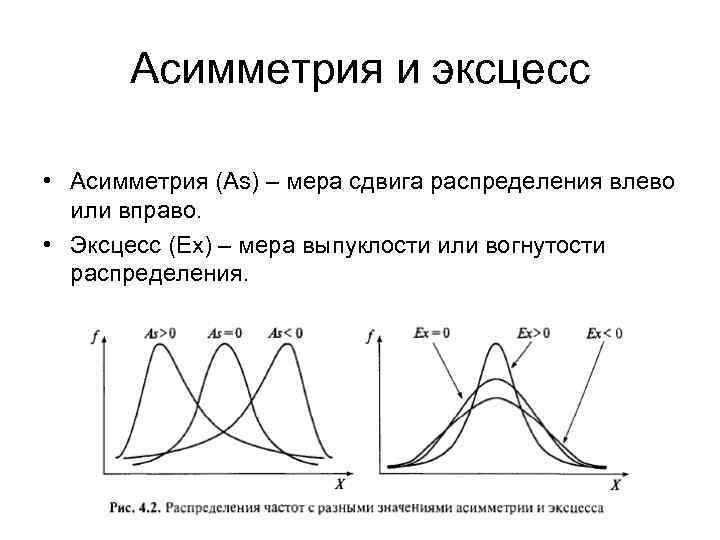

# Стат.характеристики по "грязным" данным, в которых  игнорируется только NaN

In [ ]:
file_path = '/content/r29i_os_73.sav'
df, meta = pyreadstat.read_sav(file_path)

df = df[['yj13.2','yj72.18a','yj6.2','yj10.2','yj21b']]
df.rename(columns = {'yj13.2':'ЗП',
                     'yj72.18a':'Образование',
                     'yj6.2':'Рабочая неделя',
                     'yj10.2':'Премия',
                     'yj21b':'Отпуск'},
                inplace = True) # тут замена в изначальном df

values_to_remove = [99999997, 99999998, 99999999] # 'Нет ответа' и т.д. и т.п.
df = df[~df.isin(values_to_remove)]
df['Премия'] = df['Премия'].replace(99999996, np.nan)

df.describe()

,ЗП,Образование,Рабочая неделя,Премия,Отпуск
count,4257.000000,10322.000000,4624.000000,440.000000,3035.000000
mean,29891.656566,5.655106,43.701125,9271.479545,29.602965
std,20096.675287,3.428681,12.592800,10654.752958,11.873240
min,0.000000,1.000000,3.000000,200.000000,2.000000
25%,18000.000000,2.000000,40.000000,3000.000000,24.000000
50%,25000.000000,6.000000,40.000000,5100.000000,28.000000
75%,37000.000000,10.000000,48.000000,10000.000000,35.000000
max,220000.000000,17.000000,168.000000,100000.000000,150.000000


## Стат.характеристики для ЗП

In [ ]:
data = df['ЗП']
mean_zp = np.nanmean(data)
median_zp = np.nanmedian(data)
std_zp = np.nanstd(data)
range_zp = np.nanmax(data)-np.nanmin(data)
q25_zp = np.nanpercentile(data, 25)
q75_zp = np.nanpercentile(data, 75)
asymmetry_zp = data.skew()
excess_zp = data.kurt()

stats_zp = pd.DataFrame({
    "Стат.характеристика ЗП": ["Среднее", "Медиана", 'Стандартное отклонение', "Размах", '25%','75%', "Асимметрия", "Эксцесс"],
    "Значение": [mean_zp, median_zp, std_zp, range_zp, q25_zp, q75_zp, asymmetry_zp, excess_zp]
})
stats_zp

,Стат.характеристика ЗП,Значение
0,Среднее,29891.656566
1,Медиана,25000.000000
2,Стандартное отклонение,20094.314721
3,Размах,220000.000000
4,25%,18000.000000
5,75%,37000.000000
6,Асимметрия,2.619321
7,Эксцесс,12.425261


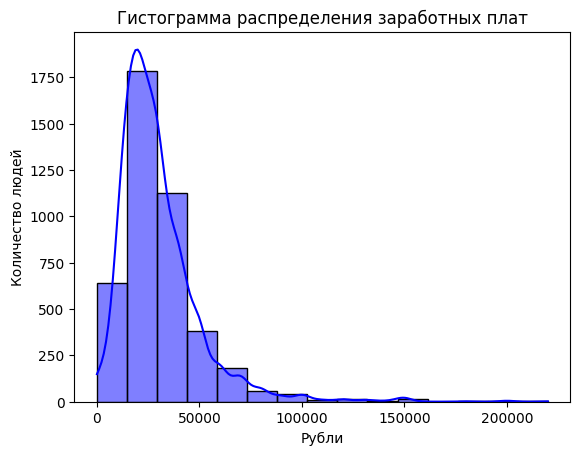

In [ ]:
sns.histplot(data, bins=15, kde=True, color='blue')
plt.xlabel("Рубли")
plt.ylabel("Количество людей")
plt.title("Гистограмма распределения заработных плат")
plt.show()

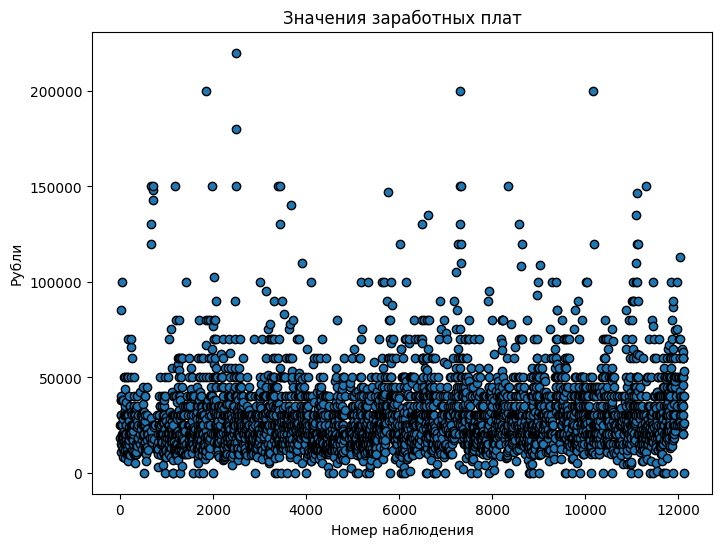

In [ ]:
x = np.arange(len(data)) # создаем массив порядковых номеров
plt.figure(figsize=(8, 6))
plt.scatter(x, data, edgecolor='k')
plt.xlabel("Номер наблюдения")
plt.ylabel("Рубли")
plt.title("Значения заработных плат")
# plt.grid(True)
plt.show()

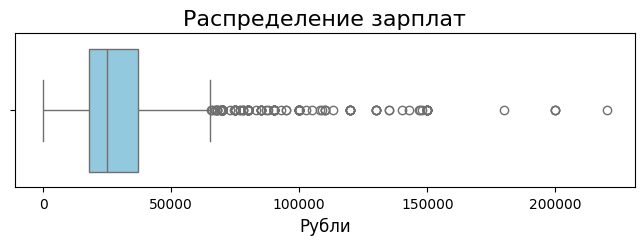

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=data, color='skyblue')

# Подписи
plt.title('Распределение зарплат', fontsize=16)
plt.xlabel('Рубли', fontsize=12)
plt.show()

## Стат.характеристика для рабочей недели

In [ ]:
data = df['Рабочая неделя']
mean_rn = np.nanmean(data)
median_rn = np.nanmedian(data)
std_rn = np.nanstd(data)
range_rn = np.nanmax(data)-np.nanmin(data)
q25_rn = np.nanpercentile(data, 25)
q75_rn = np.nanpercentile(data, 75)
asymmetry_rn = data.skew()
excess_rn = data.kurt()

stats_rn = pd.DataFrame({
    "Стат.характеристика": ["Среднее", "Медиана", 'Стандартное отклонение', "Размах", '25%','75%', "Асимметрия", "Эксцесс"],
    "Значение": [mean_rn, median_rn, std_rn, range_rn, q25_rn, q75_rn, asymmetry_rn, excess_rn]
})
stats_rn

,Стат.характеристика,Значение
0,Среднее,43.701125
1,Медиана,40.000000
2,Стандартное отклонение,12.591439
3,Размах,165.000000
4,25%,40.000000
5,75%,48.000000
6,Асимметрия,1.959059
7,Эксцесс,10.888808


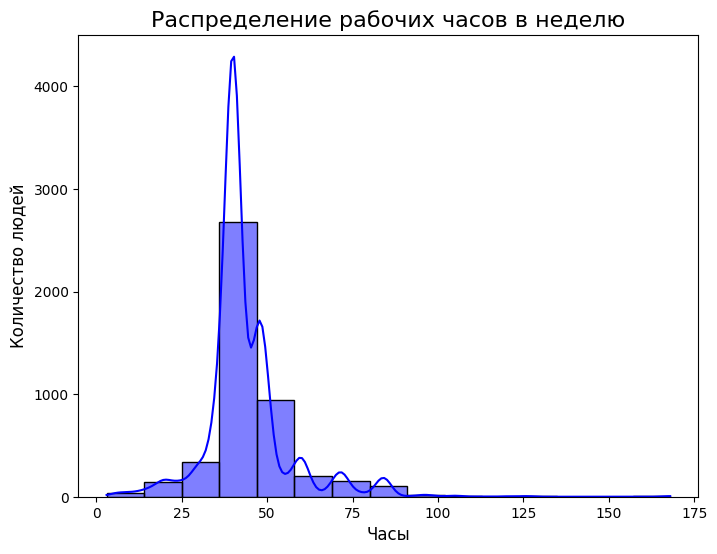

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data, bins=15, kde=True, color='blue')

# Подписи
plt.title('Распределение рабочих часов в неделю', fontsize=16)
plt.xlabel('Часы', fontsize=12)
plt.ylabel('Количество людей', fontsize=12)
plt.show()

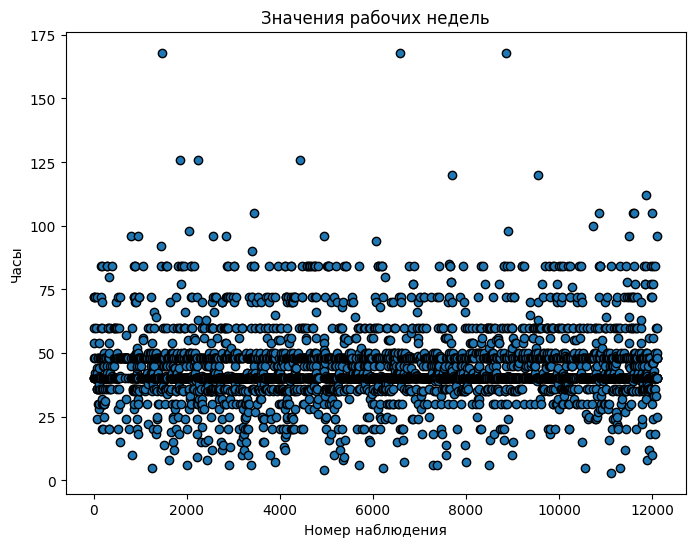

In [ ]:
x = np.arange(len(data)) # создаем массив порядковых номеров
plt.figure(figsize=(8, 6))
plt.scatter(x, data, edgecolor='k')
plt.xlabel("Номер наблюдения")
plt.ylabel("Часы")
plt.title("Значения рабочих недель")
plt.show()

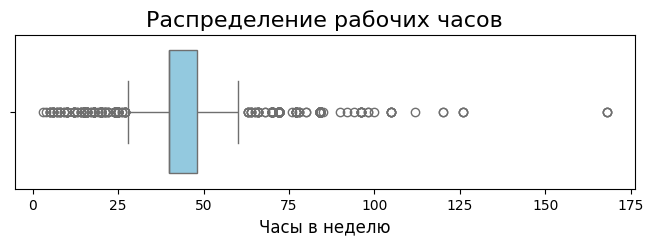

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=data, color='skyblue')

# Подписи
plt.title('Распределение рабочих часов', fontsize=16)
plt.xlabel('Часы в неделю', fontsize=12)
plt.show()


## Стат.характеристики для образования (дискретная величина)

In [ ]:
data = df['Образование'].copy()
data.replace({1:'НАЧАЛЬНАЯ ИЛИ НЕПОЛНАЯ СРЕДНЯЯ ШКОЛА',
              2:'ПОЛНАЯ СРЕДНЯЯ ШКОЛА',
              3:'ПРОФЕССИОНАЛЬНЫЕ КУРСЫ',
              4:'ПТУ',
              5:'Подготовкa квалифицир.рабочих и служащих',
              6:'Cпециалист сред.звена',
              10:'ДИПЛОМ СПЕЦИАЛИСТА',
              11:'ДИПЛОМ БАКАЛАВРА',
              12:'ДИПЛОМ МАГИСТРА',
              13:'УЧЕНАЯ СТЕПЕНЬ КАНДИДАТА НАУК',
              14:'УЧЕНАЯ СТЕПЕНЬ ДОКТОРА НАУК',
              15:'ДИПЛОМ О СРЕДНЕМ ПРОФЕССИОНАЛЬНОМ ОБРАЗОВАНИИ',
              16:'АСПИРАНТУРА БЕЗ ПОЛУЧЕНИЯ УЧЕНОЙ СТЕПЕНИ',
              17:'ОРДИНАТУРА, ИНТЕРНАТУРА'},
             inplace = True)
freq = data.value_counts()
freq

,count
Образование,
Cпециалист сред.звена,2435
ДИПЛОМ СПЕЦИАЛИСТА,2273
ПОЛНАЯ СРЕДНЯЯ ШКОЛА,1457
Подготовкa квалифицир.рабочих и служащих,1400
НАЧАЛЬНАЯ ИЛИ НЕПОЛНАЯ СРЕДНЯЯ ШКОЛА,1204
ПРОФЕССИОНАЛЬНЫЕ КУРСЫ,690
ПТУ,348
ДИПЛОМ БАКАЛАВРА,258
ДИПЛОМ О СРЕДНЕМ ПРОФЕССИОНАЛЬНОМ ОБРАЗОВАНИИ,119


<ipython-input-89-351d1cd816c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq.values, y=freq.index, palette='viridis')


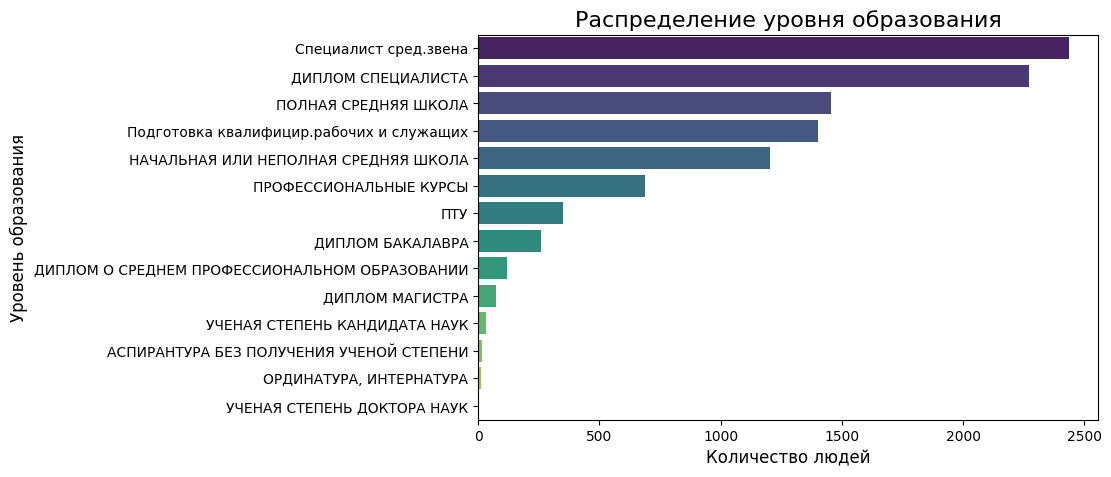

In [ ]:
# Построение гистограммы
plt.figure(figsize=(8, 5))
sns.barplot(x=freq.values, y=freq.index, palette='viridis')

# Подписи
plt.title('Распределение уровня образования', fontsize=16)
plt.ylabel('Уровень образования', fontsize=12)
plt.xlabel('Количество людей', fontsize=12)
plt.show()


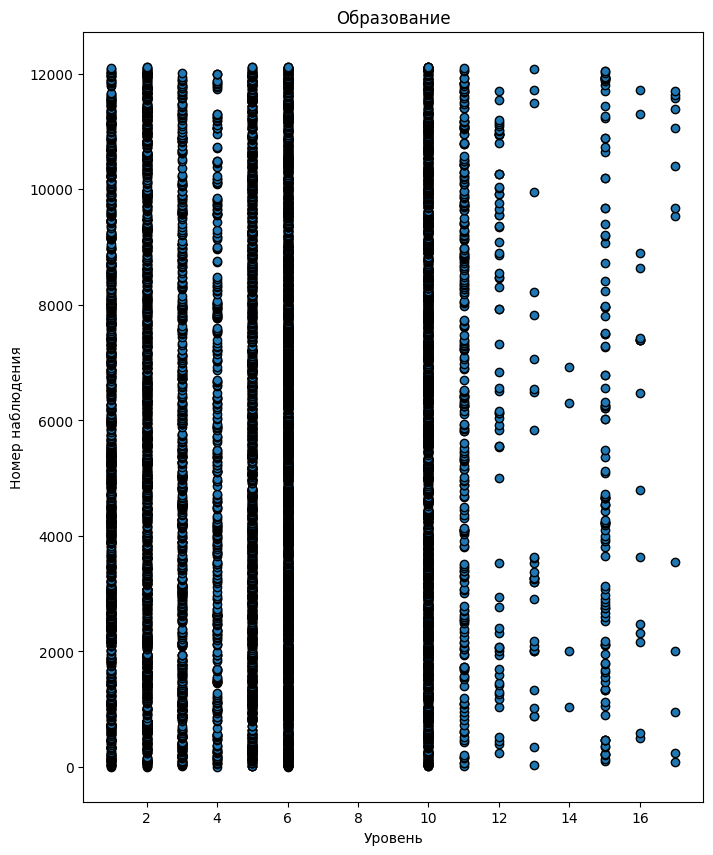

In [ ]:
x = np.arange(len(df['Образование'])) # создаем массив порядковых номеров
plt.figure(figsize=(8, 10))
plt.scatter(df['Образование'], x, edgecolor='k')
plt.ylabel("Номер наблюдения")
plt.xlabel("Уровень")
plt.title("Образование")
plt.show()

## Стат.характеристики для премии

In [ ]:
data = df['Премия']
mean_prem = np.nanmean(data)
median_prem = np.nanmedian(data)
std_prem = np.nanstd(data)
range_prem = np.nanmax(data)-np.nanmin(data)
q25_prem = np.nanpercentile(data, 25)
q75_prem = np.nanpercentile(data, 75)
asymmetry_prem = data.skew()
excess_prem = data.kurt()

stats_prem = pd.DataFrame({
    "Стат.характеристика ЗП": ["Среднее", "Медиана", 'Стандартное отклонение', "Размах", '25%','75%', "Асимметрия", "Эксцесс"],
    "Значение": [mean_prem, median_prem, std_prem, range_prem, q25_prem, q75_prem, asymmetry_prem, excess_prem]
})
stats_prem

,Стат.характеристика ЗП,Значение
0,Среднее,9271.479545
1,Медиана,5100.000000
2,Стандартное отклонение,10642.638397
3,Размах,99800.000000
4,25%,3000.000000
5,75%,10000.000000
6,Асимметрия,3.397920
7,Эксцесс,17.234789


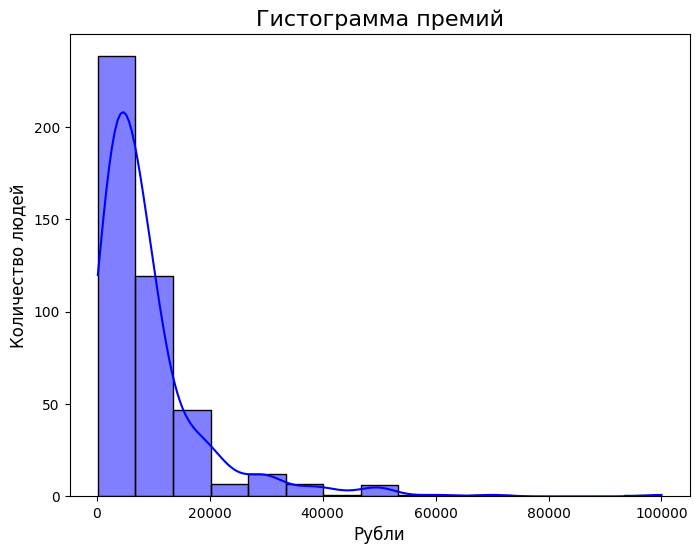

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data, bins=15, kde=True, color='blue')

# Подписи
plt.title('Гистограмма премий', fontsize=16)
plt.xlabel('Рубли', fontsize=12)
plt.ylabel('Количество людей', fontsize=12)
plt.show()

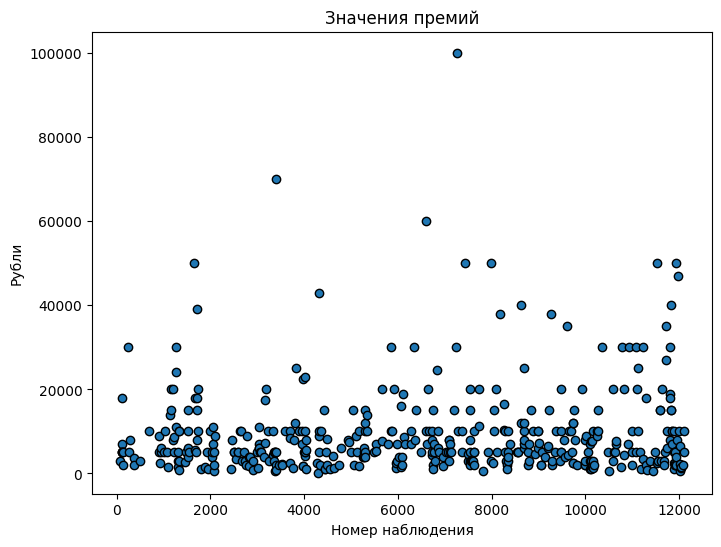

In [ ]:
x = np.arange(len(data)) # создаем массив порядковых номеров
plt.figure(figsize=(8, 6))
plt.scatter(x, data, edgecolor='k')
plt.xlabel("Номер наблюдения")
plt.ylabel("Рубли")
plt.title("Значения премий")
plt.show()

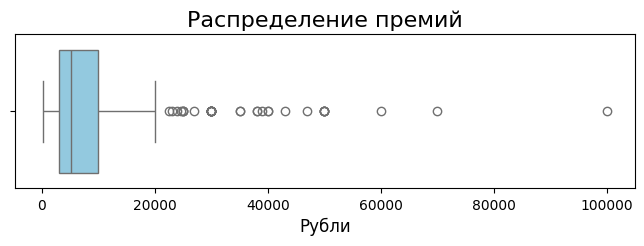

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=data, color='skyblue')

# Подписи
plt.title('Распределение премий', fontsize=16)
plt.xlabel('Рубли', fontsize=12)
plt.show()

## Стат.характеристики для отпуска



In [ ]:
data = df['Отпуск']
mean_otp = np.nanmean(data)
median_otp = np.nanmedian(data)
std_otp = np.nanstd(data)
range_otp = np.nanmax(data)-np.nanmin(data)
q25_otp = np.nanpercentile(data, 25)
q75_otp = np.nanpercentile(data, 75)
asymmetry_otp = data.skew()
excess_otp = data.kurt()

stats_otp = pd.DataFrame({
    "Стат.характеристика ЗП": ["Среднее", "Медиана", 'Стандартное отклонение', "Размах", '25%','75%', "Асимметрия", "Эксцесс"],
    "Значение": [mean_otp, median_otp, std_otp, range_otp, q25_otp, q75_otp, asymmetry_otp, excess_otp]
})
stats_otp

,Стат.характеристика ЗП,Значение
0,Среднее,29.602965
1,Медиана,28.000000
2,Стандартное отклонение,11.871283
3,Размах,148.000000
4,25%,24.000000
5,75%,35.000000
6,Асимметрия,1.334432
7,Эксцесс,5.672210


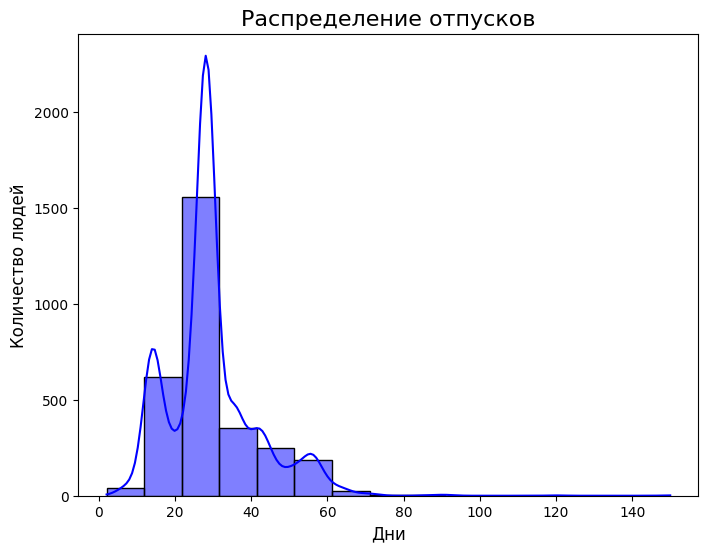

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data, bins=15, kde=True, color='blue')

# Подписи
plt.title('Распределение отпусков', fontsize=16)
plt.xlabel('Дни', fontsize=12)
plt.ylabel('Количество людей', fontsize=12)
plt.show()

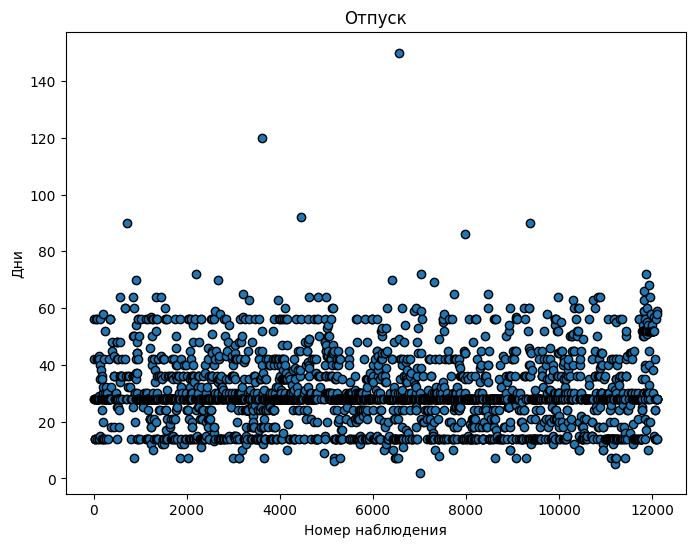

In [ ]:
x = np.arange(len(data)) # создаем массив порядковых номеров
plt.figure(figsize=(8, 6))
plt.scatter(x, data, edgecolor='k')
plt.xlabel("Номер наблюдения")
plt.ylabel("Дни")
plt.title("Отпуск")
plt.show()

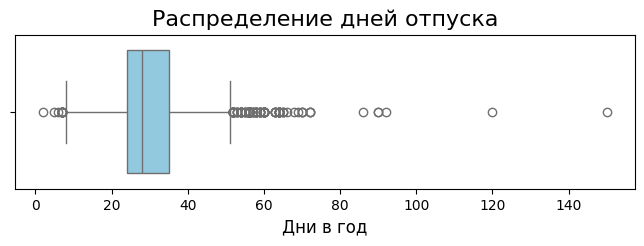

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=data, color='skyblue')

# Подписи
plt.title('Распределение дней отпуска', fontsize=16)
plt.xlabel('Дни в год', fontsize=12)
plt.show()